In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


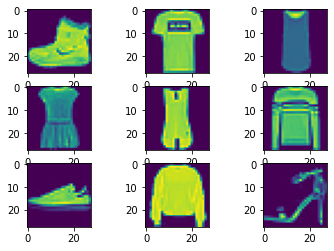

In [ ]:
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()

In [ ]:
X = X_test
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2],1))
X_test = X_test. reshape((X_test.shape[0],X_test.shape[1], X_test.shape[2],1))

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense,Activation,Dropout
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
469/469 [==============================] - 15s 6ms/step - loss: 0.5621 - accuracy: 0.7938 - val_loss: 0.4017 - val_accuracy: 0.8582
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3944 - accuracy: 0.8571 - val_loss: 0.3440 - val_accuracy: 0.8748
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3415 - accuracy: 0.8759 - val_loss: 0.3082 - val_accuracy: 0.8858
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3142 - accuracy: 0.8854 - val_loss: 0.2961 - val_accuracy: 0.8930
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2921 - accuracy: 0.8917 - val_loss: 0.2795 - val_accuracy: 0.8970
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2779 - accuracy: 0.8978 - val_loss: 0.2644 - val_accuracy: 0.9021
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2637 - accuracy: 0.9014 - val_loss: 0.2589 - val_accuracy: 0.9025
Epoch

In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)
print('Sai số kiểm tra: ', score[0])
print('Độ chính xác kiểm tra: ', score[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.9227
Sai số kiểm tra:  0.22416025400161743
Độ chính xác kiểm tra:  92.26999878883362


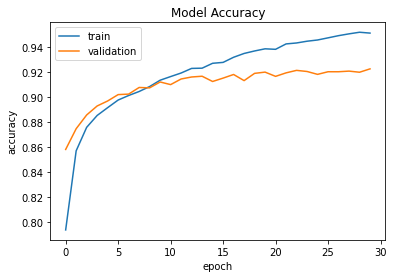

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

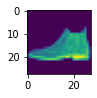

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


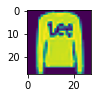

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


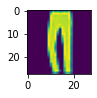

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


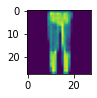

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


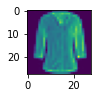

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


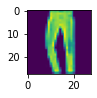

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


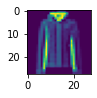

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


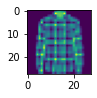

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


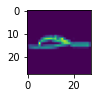

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import numpy as np
y_pred=model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1) 
  plt.imshow(X[i])
  plt.show()
  print(np.round(y_pred[i]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FASHION_MNIST_CNN.ipynb')

Mounted at /content/drive
--2022-05-19 06:59:14--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-19 06:59:14 (46.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FASHION_MNIST_CNN.ipynb to pdf
[NbConvertApp] Support files will be in FASHION_MNIST_CNN_files/
[NbConvertApp] Making directory ./FASHION_MNIST_CNN_files
[NbConvertApp] Making directory ./FASHION_MNIST_CNN_files
[NbConvertApp] Making directory ./FASHION_MNIST_CNN_files
[NbConvert

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'